<a href="https://colab.research.google.com/github/Jodieadver/cs61a/blob/master/basicCF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
!pip install surprise
import surprise

     |████████████████████████████████| 11.8 MB 23.0 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630207 sha256=e6d840a826621ee04e56e9c8e923a2ebe1da1a03f440e760f716ba003aef6094
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [5]:
names = ['userId', 'movieId', 'rating', 'timestamp']
df = pd.read_csv('data/ratings.dat', sep='::', names=names, engine='python')
ratings_data = df[['userId','movieId','rating']]
ratings_data.head()
# ratings.describe()
ratings_data['rating'].unique()

array([5, 3, 4, 2, 1])

In [6]:
#Create surprise Reader dataset
reader = surprise.Reader(line_format='user item rating',rating_scale=(0.5, 5.0))
data = surprise.Dataset.load_from_df(ratings_data[['userId', 'movieId', 'rating']], reader)

In [7]:
#Make a dataframe for storing cross validation results
results_df=pd.DataFrame(columns=['Mean-RMSE','Mean-MAE'],index=['SVD','UserCF','ItemCF'])
results_df

,Mean-RMSE,Mean-MAE
SVD,NaN,NaN
UserCF,NaN,NaN
ItemCF,NaN,NaN


In [8]:
from surprise import KNNBasic
algo2=KNNBasic(user_based=True) #User based similarity
results=surprise.model_selection.validation.cross_validate(algo2, data, measures=[u'rmse', u'mae'], cv=5)
results_df.loc['UserCF']['Mean-RMSE']=results['test_rmse'].mean()
results_df.loc['UserCF']['Mean-MAE']=results['test_mae'].mean()

#User based CF
from surprise import KNNBasic
algo3=KNNBasic(user_based=False) #Item based similarity
results=surprise.model_selection.validation.cross_validate(algo3, data, measures=[u'rmse', u'mae'], cv=5)
results_df.loc['ItemCF']['Mean-RMSE']=results['test_rmse'].mean()
results_df.loc['ItemCF']['Mean-MAE']=results['test_mae'].mean()

print(results_df);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
       Mean-RMSE  Mean-MAE
SVD          NaN       NaN
UserCF  0.923027  0.727682
ItemCF    0.9229  0.727577


In [9]:
#Create result dataframe
k_values=[30, 50,150,200,500]
cf=['UserCF','ItemCF']
cf_k_df=pd.DataFrame(columns=k_values,index=cf)
cf_k_df

,30,50,150,200,500
UserCF,NaN,NaN,NaN,NaN,NaN
ItemCF,NaN,NaN,NaN,NaN,NaN


In [10]:
for c in cf: #iterate over UserCF and ItemCF
    for k in k_values: #choose k from list
        sim_options={'name':'msd','user_based': ('User' in c)} #set user_based=True for UserCf and False for ItemCF
        print(sim_options)
        algo=KNNBasic(k=k,sim_options=sim_options)
        results=surprise.model_selection.validation.cross_validate(algo, data, measures=[u'rmse'], cv=5)
        cf_k_df.loc[c][k]=results['test_rmse'].mean()

print(cf_k_df)

{'name': 'msd', 'user_based': True}
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
{'name': 'msd', 'user_based': True}
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
{'name': 'msd', 'user_based': True}
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the ms

In [16]:

!pip install plotly

In [18]:
import matplotlib.pyplot as plt

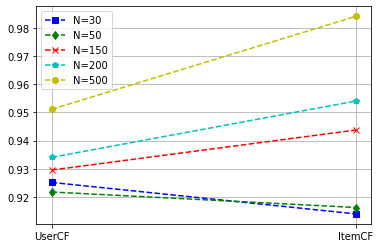

In [20]:
plt.figure()
plt.plot([0.,1.], cf_k_df[k_values[0]],'--sb', label='N=30')
plt.plot([0,1], cf_k_df[k_values[1]],'--dg',label='N=50')
plt.plot([0,1], cf_k_df[k_values[2]],'--xr', label='N=150')
plt.plot([0,1], cf_k_df[k_values[3]],'--cp', label='N=200')
plt.plot([0,1], cf_k_df[k_values[4]],'--oy', label='N=500')

plt.xticks([0,1], ['UserCF','ItemCF'])
plt.legend()
plt.grid()
plt.show();